# Nivell1
***Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn.***

## Exercici 1 + Exercici 2
***Resumeix gràficament el data set DelayedFlights.csv***

***Crea almenys una visualització per:***

In [1]:
#Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
pd.options.display.max_rows=30

***Funció per eliknar Outliers per certes gràfiques que ho necessiatarn***

***Parametres***
* DataFrame
* Primer quantile
* Terceer quantile
* Columna a depurar de la dataframe
* Retorna un nou dataframe sense outliers
    

In [2]:
# Funció que eliminar outliners de un Data frame , es pasa el dataframe elm quantile 1 i 3 
# i el nom de la columna

def elim_outliners(in_df, min,max,columna):
    quantile1= in_df[columna].quantile(min)
    quantile3= in_df[columna].quantile(max)
    iqr = quantile3-quantile1 #Interquartile range
    rang_low  = quantile1-1.5*iqr
    rang_high = quantile3+1.5*iqr
    out_df = in_df.loc[(in_df[columna]> rang_low)&(in_df[columna]< rang_high)]
    return out_df

In [3]:
delayedFlightsDf=pd.read_csv('DelayedFlights_net.csv',index_col=0,sep=',', encoding='utf8')

C:\Users\Lenovo\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


### Una variable categòrica (UniqueCarrier)
* Diagrama barres

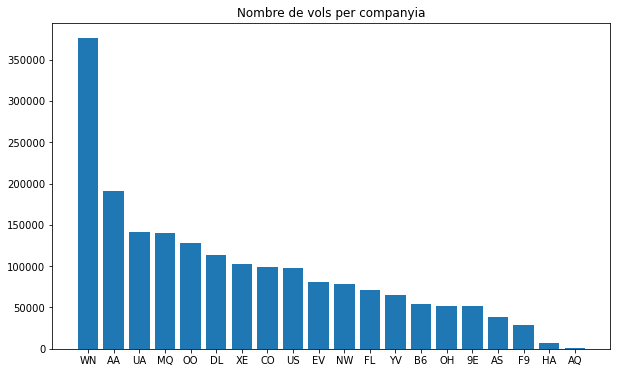

In [4]:
plt.figure(figsize =(10, 6))
numVolsDf=delayedFlightsDf['UniqueCarrier'].value_counts().copy()
plt.title('Nombre de vols per companyia')
plt.xlabel=('Companyia')
plt.ylabel=('Nombre vols')
plt.bar(numVolsDf.index,numVolsDf)
plt.show()
                                                     


* Pie diagram

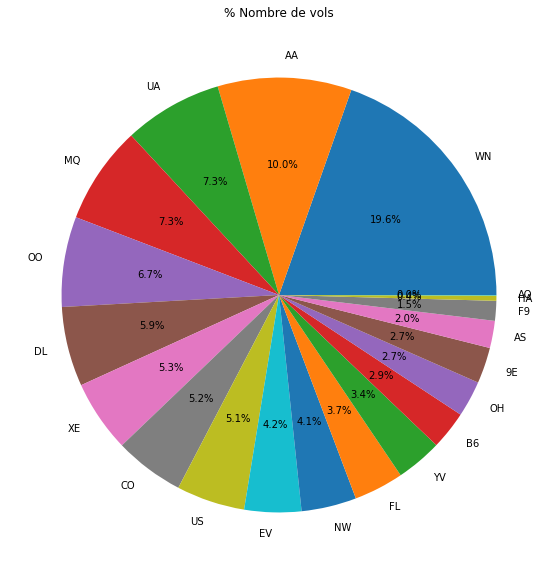

In [41]:
# Fem la figura mes gran
plt.figure(figsize=(15,10))
numVolsDf=delayedFlightsDf['UniqueCarrier'].value_counts().copy()
plt.pie(numVolsDf,autopct='%1.1f%%',labels=numVolsDf.index)
plt.title('% Nombre de vols')
#plt.show()
plt.savefig("ImgE03T01_Categ_Pie.jpg", bbox_inches='tight')

### Una variable numèrica (Arr Delay
* Historgrama

In [42]:
delays0=delayedFlightsDf[['ArrDelay']].copy()
delays1 = elim_outliners(delays0,0.25,0.75,'ArrDelay')
del delays0

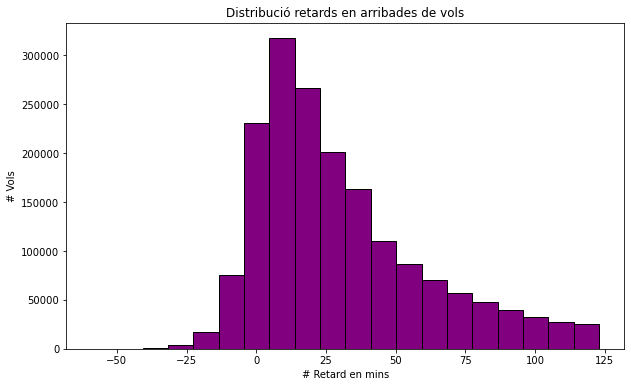

In [45]:
plt.figure(figsize =(10, 6))
plt.hist(delays1, bins=20,edgecolor='black',color='purple')
plt.title('Distribució retards en arribades de vols')
plt.ylabel("# Vols")
plt.xlabel('# Retard en mins')
#plt.show()
plt.savefig("ImgE03T01_1Num_Hist.jpg", bbox_inches='tight')

* Diagrama dre caixa

### Una variable numèrica i una categòrica  (Arr Delay i Unique carrier)

In [37]:
from importlib import reload
plt=reload(plt)

In [38]:
delaysUniqueC=delayedFlightsDf[['UniqueCarrier','ArrDelay']
                              ].groupby('UniqueCarrier').sum().sort_values('ArrDelay',ascending=False)



In [39]:
eixY=delaysUniqueC['ArrDelay']
eixX=delaysUniqueC.index


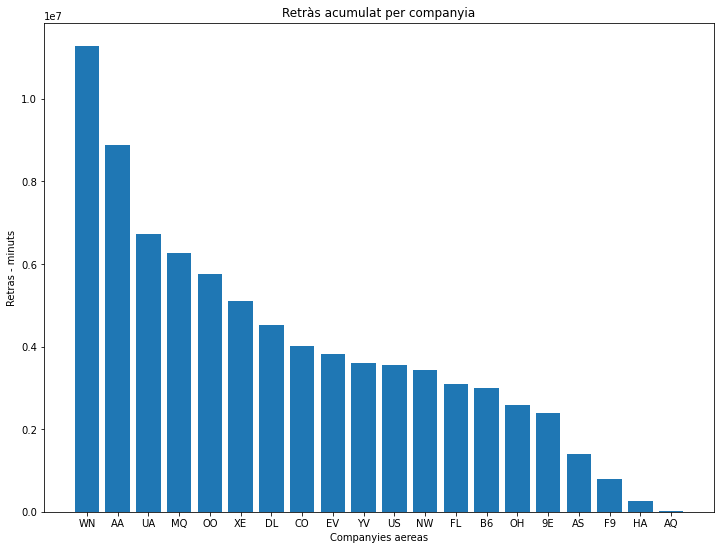

In [40]:

plt.figure(figsize =(12, 9))
plt.title('Retràs acumulat per companyia')
plt.xlabel('Companyies aereas')
plt.ylabel('Retras - minuts')
plt.bar(eixX,eixY)
#lt.show()
plt.savefig("ImgE03T01_1Categ_bar", bbox_inches='tight')
#Salvem el grafic 
#plt.savefig("ImgE03T01_Categ_1Num.jpg", bbox_inches='tight')

### Dues variables numèriques (ArrDelay i DepDelay)
***Creem un nou data frame per companyía i tipus de retard***

***Fem un grafica boxplot per veure la distribució***

***Hi han valors outliners que dificulten la interpretació que s'han de treure***

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

***preparació pel grafic boxplot ( dataframe + depuració outliers fent servir quntils1+3***

In [33]:

#Creem una dataframe amb el retard de sortida per unificar la columna dels temps deretardpel boxplot
depDelaysDf = delayedFlightsDf[['UniqueCarrier', 'DepDelay']].copy()
depDelaysDf.rename(columns={'DepDelay': 'Retard'}, inplace = True)
depDelaysDf['SortidaArribada']='Sortida'
#Creem una dataframe amb el retard d'arribafa
arrDelaysDf = delayedFlightsDf[['UniqueCarrier', 'ArrDelay']].copy()
arrDelaysDf.rename(columns={'ArrDelay': 'Retard'}, inplace = True)
arrDelaysDf['SortidaArribada']='Arribada'

#Juntem dataframes  i eliminem les generades
allDelaysDf0 = pd.concat([arrDelaysDf, depDelaysDf])
del arrDelaysDf,depDelaysDf

#eliminem outliers
allDelaysDf1 = elim_outliners(allDelaysDf0,0.25,0.75,'Retard')
del allDelaysDf0

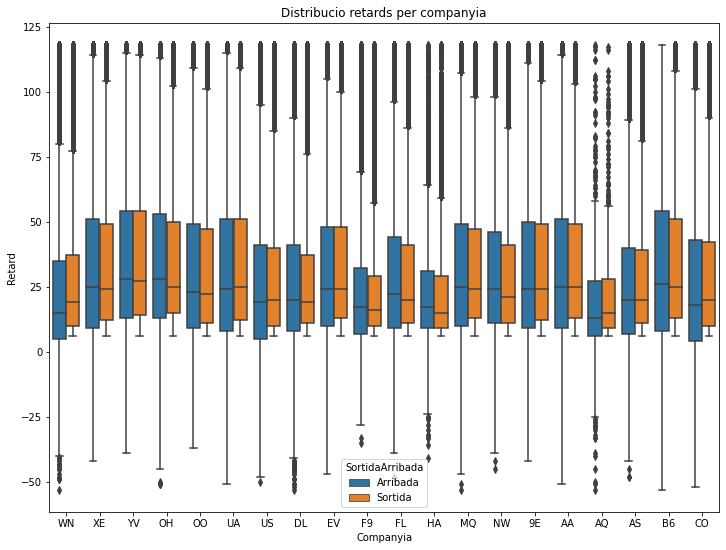

In [34]:
#fem servir seaborn
plt.figure(figsize =(12, 9))
sns.boxplot(x=allDelaysDf1['UniqueCarrier'], y=allDelaysDf1['Retard'], 
            hue=allDelaysDf1['SortidaArribada'], )
plt.title('Distribucio retards per companyia')
plt.xlabel('Companyia')
plt.ylabel('Retard')
#plt.show()
plt.savefig("ImgE03T01_Categ_2Num.jpg", bbox_inches='tight')

### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

***Generem  una nova dataframe amb la suma dels temps per Unique Carrier***

***Mostro un diagrama de barras apilades***

In [35]:

from importlib import reload
plt=reload(plt)
newDf=delayedFlightsDf.loc[:,['UniqueCarrier','ArrDelay','DepDelay','AirTime']
                          ].groupby('UniqueCarrier').sum().sort_values('UniqueCarrier')
#separem les columnes per generar barres apilades
bar1=newDf['AirTime']
bar2=newDf['ArrDelay']
bar3=newDf['DepDelay']

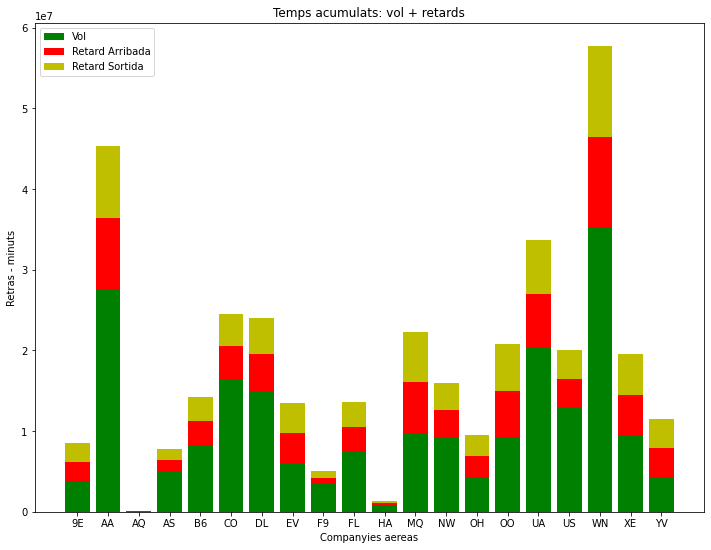

In [36]:
# diagrama de barres apilades
plt.figure(figsize=(12, 9))
plt.title('Temps acumulats: vol + retards')
plt.xlabel('Companyies aereas')
plt.ylabel('Retras - minuts')
plt.bar(newDf.index, bar1 ,  color='g',label="Vol")
plt.bar(newDf.index, bar2, bottom=bar1,  label="Retard Arribada",color='r')
plt.bar(newDf.index, bar2, bottom=bar1+bar2, label="Retard Sortida", color='y')
plt.legend()
#plt.show()
plt.savefig("ImgE03T01_1Categ_3Num.jpg", bbox_inches='tight')

